#Uploading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Reviews.csv',encoding='latin1',on_bad_lines="skip")

In [3]:
df=df.dropna()

In [4]:
df.head()

,Id,reviews
0,1,I have bought several of the Vitality canned d...
1,2,Product arrived labeled as Jumbo Salted Peanut...
2,3,This is a confection that has been around a fe...
3,4,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(90000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       90000 non-null  int64 
 1   reviews  90000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Id
count,90000.000000
mean,45000.500000
std,25980.906451
min,1.000000
25%,22500.750000
50%,45000.500000
75%,67500.250000
max,90000.000000


#Text Preprocessing

In [8]:
import nltk
import re
import string

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [11]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)      # remove HTML
    text = re.sub(r'[^a-z ]', '', text)    # remove numbers & symbols
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word)
              for word in tokens
              if word not in stop_words and len(word) > 2]
    return tokens

In [12]:
df['cleaned_review'] = df['reviews'].apply(preprocess)

In [13]:
df.head()

,Id,reviews,cleaned_review
0,1,I have bought several of the Vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,2,Product arrived labeled as Jumbo Salted Peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,3,This is a confection that has been around a fe...,"[confection, around, century, light, pillowy, ..."
3,4,If you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
4,5,Great taffy at a great price. There was a wid...,"[great, taffy, great, price, wide, assortment,..."


#Wordcloud Representation

In [14]:
import matplotlib.pyplot as plt


In [15]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

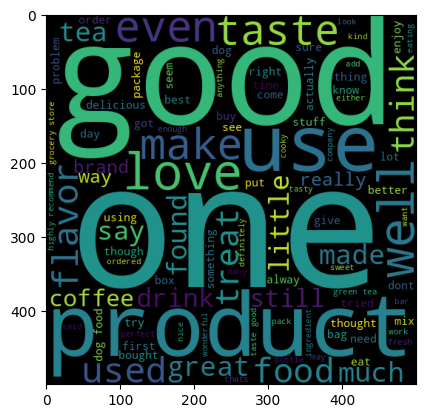

In [16]:
rev_wc=wc.generate(df['cleaned_review'].apply(lambda x: ' '.join(x)).str.cat(sep=' '))
plt.imshow(rev_wc)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv= CountVectorizer(max_df=0.95, min_df= 2, stop_words='english')
dtm=cv.fit_transform(df['reviews'])

In [19]:
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2767503 stored elements and shape (90000, 30062)>

#LDA

In [20]:
from sklearn.decomposition import LatentDirichletAllocation

In [21]:
LDA=LatentDirichletAllocation(n_components=3,random_state=42)

In [22]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=42)

In [23]:
import random

In [24]:
for i in range(10):
  random_word_id=random.randint(0,30062)
  print(cv.get_feature_names_out()[random_word_id])

bod
england
wanders
vitakraft
relaxing
gopher
concerned
prominently
nice
gooey


#Showing Top words per topic

In [25]:
len(LDA.components_)

3

In [26]:
len(LDA.components_[0])

30062

In [27]:
single_topic=LDA.components_[0]

In [28]:
#Returns the indices that would sort this array
single_topic.argsort()

array([17410,  9475, 21909, ...,  4099,  6058, 26647])

In [29]:
#Word least representative of this topic
single_topic[4099]

np.float64(21430.67213161512)

In [30]:
#Word most representative of this topic
single_topic[26647]

np.float64(23145.54934895388)

In [31]:
top_word_indices=single_topic.argsort()[-10:]

In [32]:
for index in top_word_indices:
  print(cv.get_feature_names_out()[index])

product
cup
great
flavor
taste
good
like
br
coffee
tea


In [33]:
for index,topic in enumerate(LDA.components_):
  print(f"THE TOP 15 WORDS FOR TOPIC #{index}")
  print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
  print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['love', 'price', 'drink', 'amazon', 'just', 'product', 'cup', 'great', 'flavor', 'taste', 'good', 'like', 'br', 'coffee', 'tea']


THE TOP 15 WORDS FOR TOPIC #1
['don', 'chips', 'really', 'sweet', 'love', 'sugar', 'product', 'chocolate', 'great', 'just', 'flavor', 'good', 'taste', 'like', 'br']


THE TOP 15 WORDS FOR TOPIC #2
['amazon', 'loves', 'time', 'eat', 'love', 'treats', 'good', 'great', 'dogs', 'just', 'like', 'product', 'dog', 'food', 'br']




#Creating Topic Labels

In [44]:
topic_labels = {
    0: "Coffee & Tea Beverage Reviews",
    1: "Sweet Snacks & Chocolate Products",
    2: "Dog Food & Pet Treats"
}


In [45]:
feature_names = cv.get_feature_names_out()

for index, topic in enumerate(LDA.components_):

    label = topic_labels.get(index, "Unknown Topic")

    print(f"TOPIC #{index} : {label}")
    print([feature_names[i] for i in topic.argsort()[-15:]])
    print("\n")


TOPIC #0 : Coffee & Tea Beverage Reviews
['love', 'price', 'drink', 'amazon', 'just', 'product', 'cup', 'great', 'flavor', 'taste', 'good', 'like', 'br', 'coffee', 'tea']


TOPIC #1 : Sweet Snacks & Chocolate Products
['don', 'chips', 'really', 'sweet', 'love', 'sugar', 'product', 'chocolate', 'great', 'just', 'flavor', 'good', 'taste', 'like', 'br']


TOPIC #2 : Dog Food & Pet Treats
['amazon', 'loves', 'time', 'eat', 'love', 'treats', 'good', 'great', 'dogs', 'just', 'like', 'product', 'dog', 'food', 'br']




#Deploying the model

In [46]:
import pickle

# Save LDA model
pickle.dump(LDA, open("lda_model.pkl", "wb"))

# Save vectorizer
pickle.dump(cv, open("vectorizer.pkl", "wb"))


In [47]:
topic_labels = {
    0: "Coffee & Tea Beverage Reviews",
    1: "Sweet Snacks & Chocolate Products",
    2: "Dog Food & Pet Treats"
}

pickle.dump(topic_labels, open("topic_labels.pkl", "wb"))


In [48]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load saved files
lda = pickle.load(open("lda_model.pkl", "rb"))
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))
topic_labels = pickle.load(open("topic_labels.pkl", "rb"))

st.title("🛍️ Customer Review Topic Predictor")

user_input = st.text_area("Enter Customer Review")

if st.button("Predict Topic"):

    # Vectorize input
    vect_text = vectorizer.transform([user_input])

    # Get topic probabilities
    topic_prob = lda.transform(vect_text)

    # Get dominant topic
    topic_num = np.argmax(topic_prob)

    # Get label
    topic_name = topic_labels[topic_num]

    st.success(f"Predicted Topic: {topic_name}")


Writing app.py
